In [21]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import bs4 as bs
import lxml.html as lh

In [22]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
res=requests.get(url)
res

<Response [200]>

In [23]:
soup=bs.BeautifulSoup(res.content,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"619aa236-74a4-4d93-b682-88d9dbe449b8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario-relat

In [24]:
table=soup.find_all('table')[0]
table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [25]:
df=pd.read_html(str(table))
df

[    Postal Code  ...                                       Neighborhood
 0           M1A  ...                                       Not assigned
 1           M2A  ...                                       Not assigned
 2           M3A  ...                                          Parkwoods
 3           M4A  ...                                   Victoria Village
 4           M5A  ...                          Regent Park, Harbourfront
 ..          ...  ...                                                ...
 175         M5Z  ...                                       Not assigned
 176         M6Z  ...                                       Not assigned
 177         M7Z  ...                                       Not assigned
 178         M8Z  ...  Mimico NW, The Queensway West, South of Bloor,...
 179         M9Z  ...                                       Not assigned
 
 [180 rows x 3 columns]]

In [26]:
data=pd.read_json(df[0].to_json(orient='records'))
data.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [27]:
remove_unassighned_data=data[data['Borough'] != 'Not assigned	']
remove_unassighned_data

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [28]:
remove_unassighned_data = remove_unassighned_data.groupby(['Borough','Postal Code'],as_index=False).agg(','.join)
remove_unassighned_data

,Borough,Postal Code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
...,...,...,...
175,York,M6C,Humewood-Cedarvale
176,York,M6E,Caledonia-Fairbanks
177,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
178,York,M6N,"Runnymede, The Junction North"


In [29]:
remove_unassighned_data['Neighborhood']=np.where(remove_unassighned_data['Neighborhood']=='Not assigned',remove_unassighned_data['Borough'],remove_unassighned_data['Neighborhood'])

In [31]:
remove_unassighned_data

,Borough,Postal Code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
...,...,...,...
175,York,M6C,Humewood-Cedarvale
176,York,M6E,Caledonia-Fairbanks
177,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
178,York,M6N,"Runnymede, The Junction North"


In [32]:
remove_unassighned_data.shape


(180, 3)

# **Geocoder package**

In [33]:
geo_url='http://cocl.us/Geospatial_data'
geo_data=pd.read_csv(geo_url)
geo_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [34]:
geo_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [36]:
new_data=pd.merge(remove_unassighned_data,geo_data,on='Postal Code')


In [38]:
new_data.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


# **Q3**

In [39]:
new_data['Coordinates']=list(zip(new_data['Latitude'],new_data['Longitude']))
new_data.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [49]:
!pip install geopandas


  Using cached https://files.pythonhosted.org/packages/f8/dd/c0a6429cc7692efd5c99420c9df525c40f472b50705871a770449027e244/geopandas-0.8.0-py2.py3-none-any.whl
     |████████████████████████████████| 10.9MB 2.7MB/s 
     |████████████████████████████████| 14.7MB 320kB/s 


In [50]:
from shapely.geometry import Point
import geopandas as gpd


In [46]:
new_data['Coordinates']=new_data['Coordinates'].apply(Point)
new_data.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.7280205 -79.38879009999999)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.7127511 -79.3901975)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.7153834 -79.40567840000001)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.7043244 -79.38879009999999)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.6895743 -79.38315990000001)


In [52]:
geo_df=gpd.GeoDataFrame(new_data,geometry='Coordinates')
geo_df.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.72802 -79.38879)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.71275 -79.39020)
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,POINT (43.71538 -79.40568)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.70432 -79.38879)
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,POINT (43.68957 -79.38316)


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


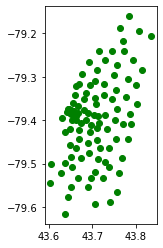

In [62]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
geo_df.plot(ax=ax, color='g')

plt.show()